In [1]:
'''%pip install openqaoa

%pip install pandas
%pip install requests
%pip install geojson
%pip install geopandas

%pip install cplex

%pip install qiskit
%pip install fiona
%pip install pyogrio
%pip install pyproj
%pip install rtree 
%pip install shapely
%pip install numpy
%pip install geodatasets
%pip install geoplot
%pip install matplotlib
%pip install qiskit[visualization]
%pip install folium
%pip install libpysal
%pip install dwave-ocean-sdk
%pip install networkx


%pip install scikit-learn
%pip install qiskit[optimization]

%pip install more-itertools
%matplotlib inline
'''

'%pip install openqaoa\n\n%pip install pandas\n%pip install requests\n%pip install geojson\n%pip install geopandas\n\n%pip install cplex\n\n%pip install qiskit\n%pip install fiona\n%pip install pyogrio\n%pip install pyproj\n%pip install rtree \n%pip install shapely\n%pip install numpy\n%pip install geodatasets\n%pip install geoplot\n%pip install matplotlib\n%pip install qiskit[visualization]\n%pip install folium\n%pip install libpysal\n%pip install dwave-ocean-sdk\n%pip install networkx\n\n\n%pip install scikit-learn\n%pip install qiskit[optimization]\n\n%pip install more-itertools\n%matplotlib inline\n'

In [2]:

from QGONexum import QGOProblem, QGOGraph, QGOOptimizer 


from qiskit import QuantumCircuit, execute, transpile
from qiskit.providers.basicaer import UnitarySimulatorPy
from qiskit.tools.monitor import job_monitor

import pandas
import pyogrio 
import requests

import folium
import fiona 

import openqaoa

import networkx as nx
import pyproj
import rtree
import shapely
import geojson
import matplotlib as mpl
import matplotlib.pyplot as pyp
import geopandas as gpd
import geodatasets
import dimod

import libpysal
from libpysal import weights

import numpy as np
import sklearn



import numpy as np
import numpy.random as random

import more_itertools

    
import cplex
import sympy as sp

import matplotlib.pyplot as plt

from math import acos

# Printing configuration
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from IPython.display import display, Markdown


from openqaoa.problems import MaximumCut, NumberPartition, MinimumVertexCover, QUBO
from openqaoa.utilities import plot_graph, ground_state_hamiltonian
from openqaoa.qaoa_components import Hamiltonian


#import the QAOA workflow model
from openqaoa import QAOA

#import method to specify the device
from openqaoa.backends import create_device



from sklearn.metrics import pairwise_distances

from docplex.mp.model import Model
from docplex.mp.model_reader import ModelReader

from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import CplexOptimizer
from qiskit_optimization.translators import from_docplex_mp



from qiskit_optimization.converters import (
    InequalityToEquality,     # converts inequality constraints to equality constraints by adding slack variables
    LinearEqualityToPenalty,  # converts linear equality constraints to quadratic penalty terms 
    IntegerToBinary,          # converts integer variables to binary variables
    QuadraticProgramToQubo    # combines the previous three converters
)

from qiskit_optimization.algorithms.admm_optimizer import ADMMParameters, ADMMOptimizer
from qiskit.algorithms.minimum_eigensolvers import QAOA, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import CobylaOptimizer, MinimumEigenOptimizer
from qiskit_optimization.algorithms import CplexOptimizer

In [3]:

pyp.rcParams["figure.figsize"] = (20, 20)

links = ["mineral_production_facilities.geojson"]

links.append("mineral_sources.geojson")
links.append("possible_solar.geojson")

cutoffs = [5, 5, 10]

prefixes = ["possible_solar", "powerplants", "high_schools"]

ccc_problem = QGOProblem(links, prefixes, cutoffs)

{(<QGONexum.QAOANode object at 0x7f067076c8e0>, <QGONexum.QAOANode object at 0x7f061c55c8e0>): 'edge0', (<QGONexum.QAOANode object at 0x7f067076c8e0>, <QGONexum.QAOANode object at 0x7f061c55ca90>): 'edge1', (<QGONexum.QAOANode object at 0x7f067076c8e0>, <QGONexum.QAOANode object at 0x7f061c55cc40>): 'edge2', (<QGONexum.QAOANode object at 0x7f067076c8e0>, <QGONexum.QAOANode object at 0x7f061c55cdf0>): 'edge3', (<QGONexum.QAOANode object at 0x7f067076c8e0>, <QGONexum.QAOANode object at 0x7f061c55cfa0>): 'edge4', (<QGONexum.QAOANode object at 0x7f061ca97130>, <QGONexum.QAOANode object at 0x7f061c55c8e0>): 'edge5', (<QGONexum.QAOANode object at 0x7f061ca97130>, <QGONexum.QAOANode object at 0x7f061c55ca90>): 'edge6', (<QGONexum.QAOANode object at 0x7f061ca97130>, <QGONexum.QAOANode object at 0x7f061c55cc40>): 'edge7', (<QGONexum.QAOANode object at 0x7f061ca97130>, <QGONexum.QAOANode object at 0x7f061c55cdf0>): 'edge8', (<QGONexum.QAOANode object at 0x7f061ca97130>, <QGONexum.QAOANode object

Problem name: max_flow_model

Maximize
  _edge0#0 + _edge1#1 + _edge10#10 + _edge11#11 + _edge12#12 + _edge13#13
  + _edge14#14 + _edge2#2 + _edge3#3 + _edge4#4 + _edge5#5 + _edge6#6 + _edge7#7
  + _edge8#8 + _edge9#9

Subject to
  Linear constraints (1)
    _edge0#0 + _edge10#10 - _edge15#15 - _edge16#16 - _edge17#17 - _edge18#18
    - _edge19#19 - _edge20#20 - _edge21#21 - _edge22#22 - _edge23#23
    - _edge24#24 + _edge5#5 == 0  '_0#0'

  Continuous variables (65)
    0 <= _edge0#0 <= 0.490174453087852
    0 <= _edge1#1 <= 0.506793567776035
    0 <= _edge2#2 <= 0.498807849240316
    0 <= _edge3#3 <= 0.543513707415701
    0 <= _edge4#4 <= 0.492516216096414
    0 <= _edge5#5 <= 0.428467555793973
    0 <= _edge6#6 <= 0.509684255700437
    0 <= _edge7#7 <= 0.410811068400452
    0 <= _edge8#8 <= 0.45551674046797
    0 <= _edge9#9 <= 0.430255756929592
    0 <= _edge10#10 <= 3.90137328339572
    0 <= _edge11#11 <= 5.27927357195635
    0 <= _edge12#12 <= 3.48056106644385
    0 <= _edge13#13

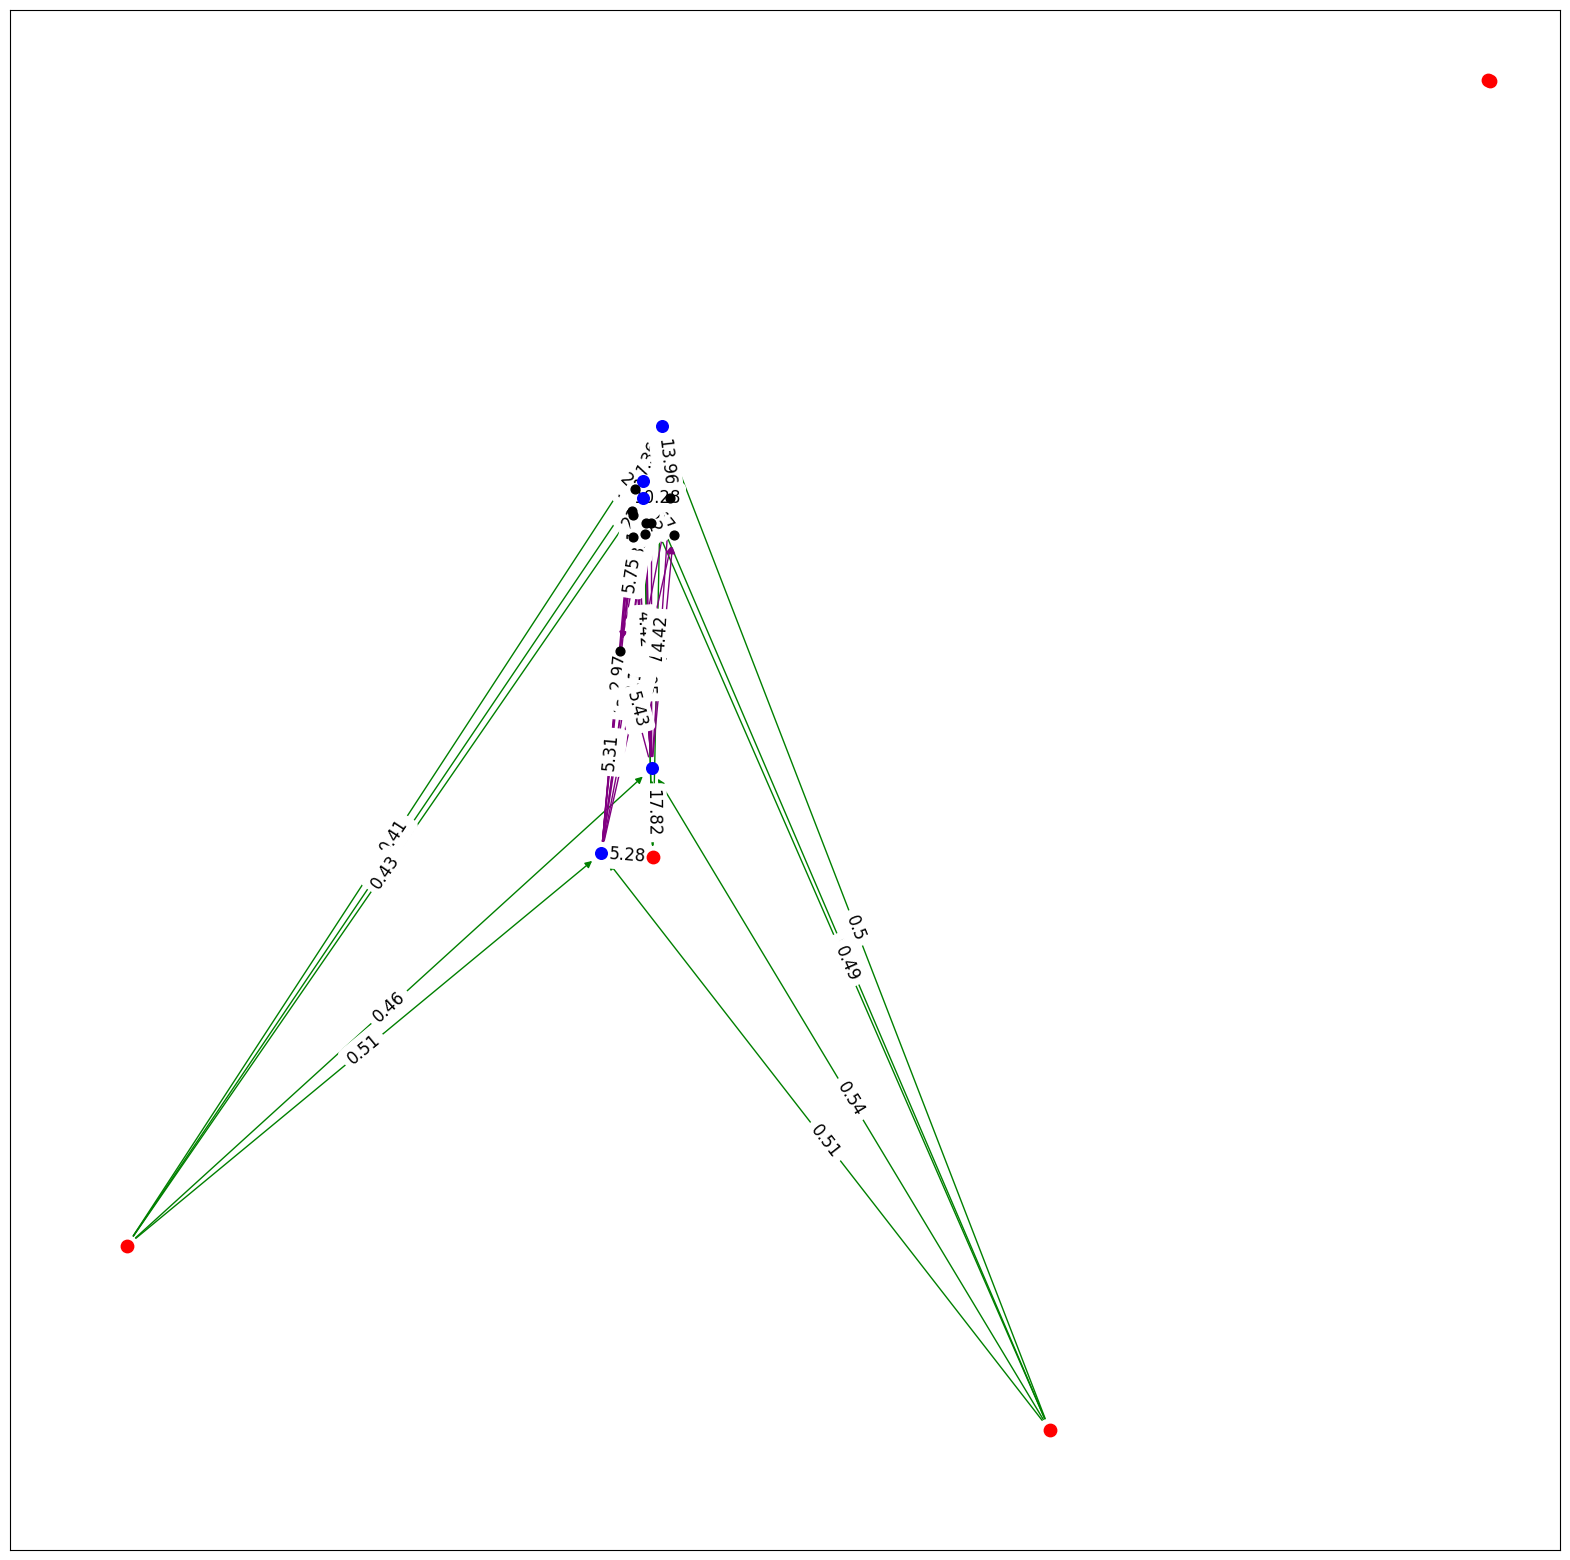

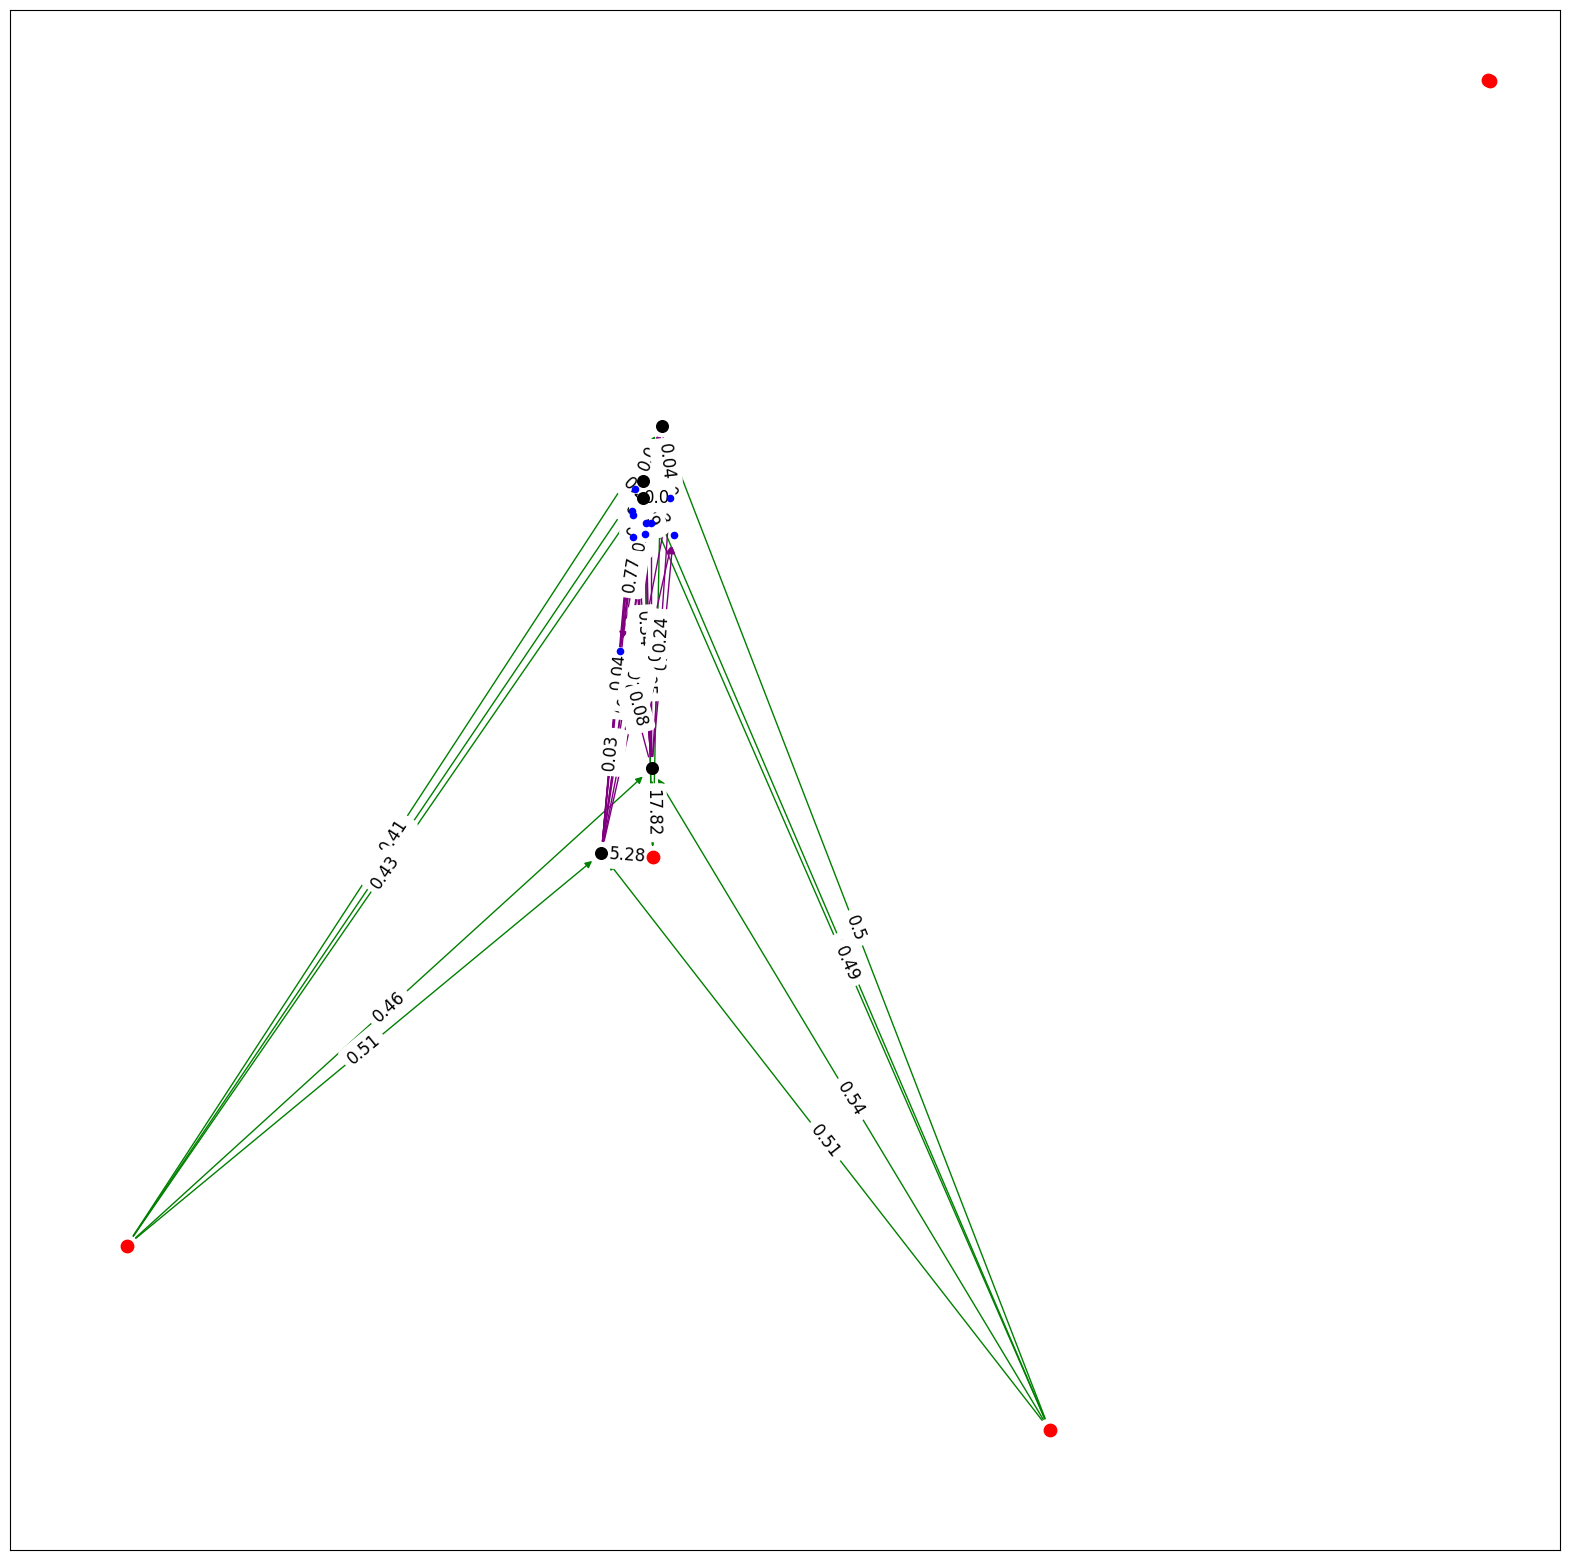

In [4]:
thresholds = [3, 10]

ccc_graph = QGOGraph(ccc_problem, thresholds)

ccc_graph.createGraph()
ccc_graph.draw()

ccc_optimize = QGOOptimizer()
ccc_optimize.optimize(problem=ccc_problem, QGOGraph=ccc_graph)

sol_graph = ccc_optimize.createSolutionGraph(ccc_problem, ccc_graph)

nx.write_edgelist(sol_graph, "edgelist.json")

